Carilah dataset real, bebas dari internet dengan ketentuan sbb:

jumlah total atribut lebih dari 5
minimal jumlah data adalah 100 data
dapat digunakan untuk pemodelan Regresi
Kemudian, lakukan beberapa hal berikut:

1.tentukan variable dependent dan independent dari dataset

2.lakukan eksplorasi dan visualisasi data

3.lakukan data analisis dan juga pengecekan serta pembersihan data dari outlier dan missing data jika diperlukan

4.lakukan pemodelan regresi (linear dan berganda) dan seleksi fitur dengan korelasi agar mendapatkan atribut (variable independent) yang baik untuk digunakan pada model regresi

5.analisa dan jelaskan hasil evaluasi pemodelan regresi

6.lakukan pemodelan dengan regresi logistik dengan data yang sama dengan cara mentransformasikan variable dependent yang awalnya bernilai continue menjadi categorical (hint: Gunakan Binning Data in Pandas).
Contoh: variable dependent harga mobil (bernilai continue) ditransformasikan menjadi harga model Mahal dan Murah (untuk 2 kelas), dan Mahal, Sedang, Murah (untuk 3 kelas)

7.analisa dan jelaskan hasil evaluasi pemodelan regresi logistik


In [100]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [101]:
csv_path = "Studentperformance.csv"
data_raw = pd.read_csv(csv_path)
data_raw.info()
data_raw.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   avg score                    1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,73
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76
5,female,group B,associate's degree,standard,none,71,83,78,77
6,female,group B,some college,standard,completed,88,95,92,92
7,male,group B,some college,free/reduced,none,40,43,39,41
8,male,group D,high school,free/reduced,completed,64,64,67,65
9,female,group B,high school,free/reduced,none,38,60,50,49


In [ ]:
data_raw.describe()

,math score,reading score,writing score,avg score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.762000
std,15.16308,14.600192,15.195657,14.258354
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.000000
50%,66.00000,70.000000,69.000000,68.000000
75%,77.00000,79.000000,79.000000,78.000000
max,100.00000,100.000000,100.000000,100.000000


In [ ]:
# lakukan pengecekan kolom yang bertipe object sebelum diubah menjadi int 
print(data_raw["race/ethnicity"].value_counts())
print("=====================================")
print(data_raw["gender"].value_counts())
print("=====================================")
print(data_raw["parental level of education"].value_counts())
print("=====================================")
print(data_raw["test preparation course"].value_counts())
print("=====================================")
print(data_raw["lunch"].value_counts())
print("=====================================")


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
female    518
male      482
Name: gender, dtype: int64
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
none         642
completed    358
Name: test preparation course, dtype: int64
standard        645
free/reduced    355
Name: lunch, dtype: int64


In [ ]:
#lakukan pengubahan data bertipe obj -> int 
new_data ={
    "gender" : {
        "male"    : 1,
        "female"  : 0
    },
    "race/ethnicity" :{
        "group A" : 1,
        "group B" : 2,
        "group C" : 3,
        "group D" : 4,
        "group E" : 5
    },
    "parental level of education" :{
        "some college"        : 4,        
        "associate's degree"  : 3, 
        "high school"         : 5,
        "some high school"    : 6,
        "bachelor's degree"   : 2,
        "master's degree"     : 1
    },
    "test preparation course" :{
        "none"        :1,
        "completed"   :2        
    },
    "lunch" :{
        "standard"       :1,
        "free/reduced"   :2        
    }


}
data = data_raw.replace(new_data)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,0,2,2,1,1,72,72,74,73
1,0,3,4,1,2,69,90,88,82
2,0,2,1,1,1,90,95,93,93
3,1,1,3,2,1,47,57,44,49
4,1,3,4,1,1,76,78,75,76


## dataset summary
<pre>
 +   gender                       : gender of the student
 +   race/ethnicity               : race or ethnicity of the student
 +   parental level of education  : student parent's last education level
 +   lunch                        : type of accomodation the student get for lunch at school 
 +   test preparation course      : whather or not the student finish the test preperation before the test
 +   math score                   : the result of math test
 +   reading score                : the result of reading test
 +   writing score                : the result of writing test
 +   Avg score                    : the average of test result

## Nomor 1
#Variable Dependent dan Independent dari dataset:
<pre>
dependent  : avg score
independen : gender, race/ethnicity,parental level of education, test preparation course, math score, reading score, writing score

</pre>

## Nomor 2
#Visualisasi dan Ekplorasi Data


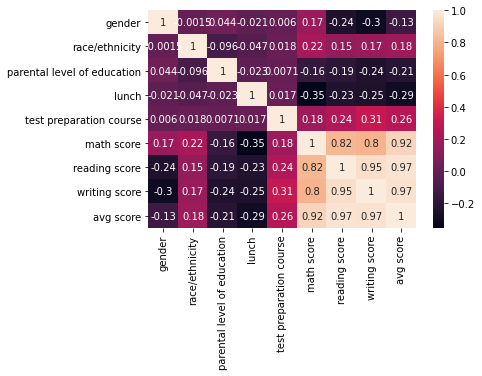

In [ ]:
#Menampilkan correlasi data 
sb.heatmap(data.corr(), annot=True)

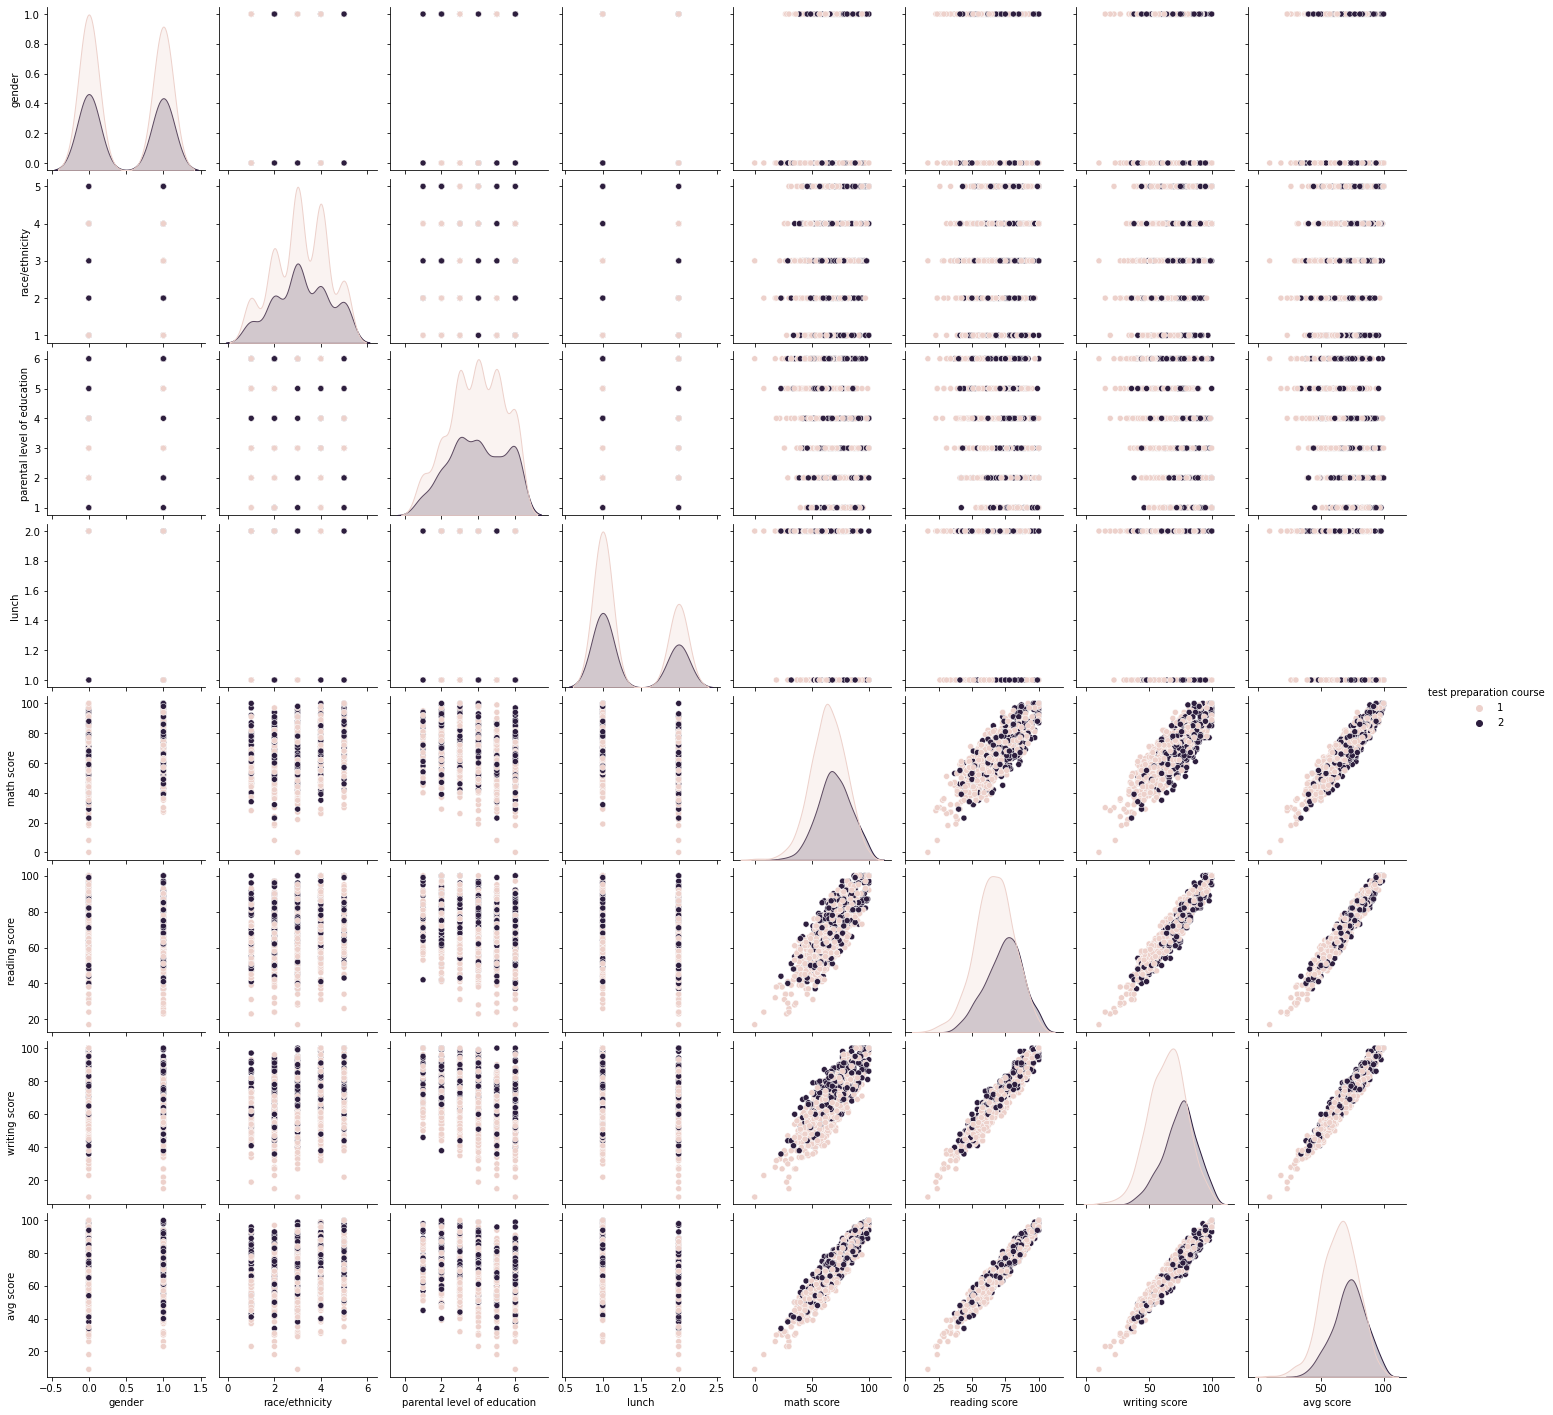

In [ ]:
#Melihat keterkaitan antar variabel berdasarkan test preparation course
sb.pairplot(data, hue ="test preparation course")

<Figure size 720x504 with 0 Axes>

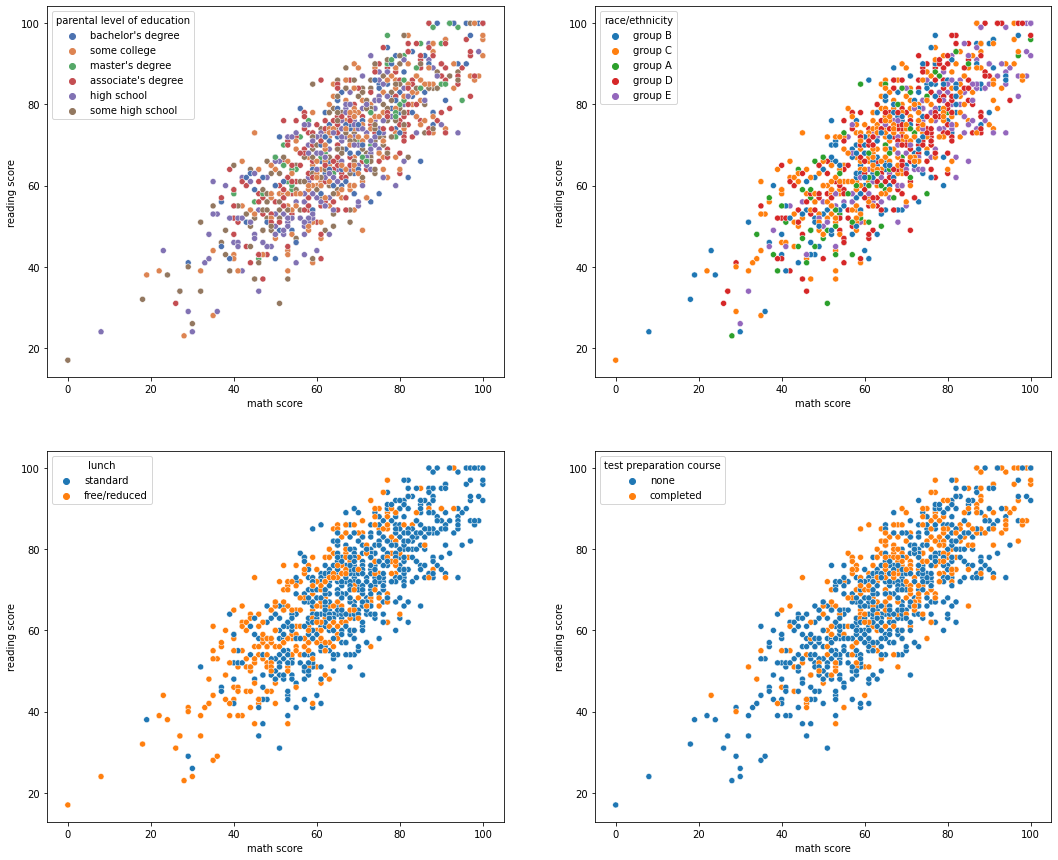

In [ ]:
#Pengaruh parental level of education, race, lunch , and test preperation on math and reading score
plt.figure(figsize = (10,7))
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
sb.scatterplot(x= 'math score', y = 'reading score' , hue = 'parental level of education', data = data_raw, ax=axes[0, 0], palette="deep")
sb.scatterplot(x= 'math score', y = 'reading score' , hue = 'race/ethnicity', data = data_raw, ax=axes[0, 1])
sb.scatterplot(x= 'math score', y = 'reading score' , hue = 'lunch', data = data_raw, ax=axes[1, 0])
sb.scatterplot(x= 'math score', y = 'reading score' , hue = 'test preparation course', data = data_raw, ax=axes[1, 1])

<Figure size 1800x3600 with 0 Axes>

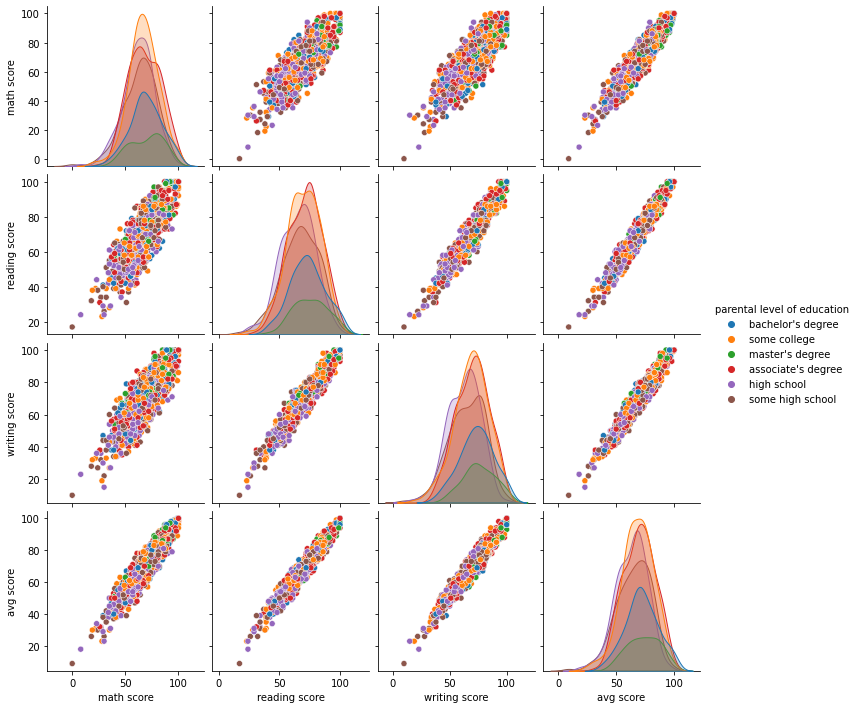

In [ ]:
plt.figure(figsize=(25,50))
sb.pairplot(data_raw, hue = 'parental level of education')
plt.show()

<Figure size 1080x720 with 0 Axes>

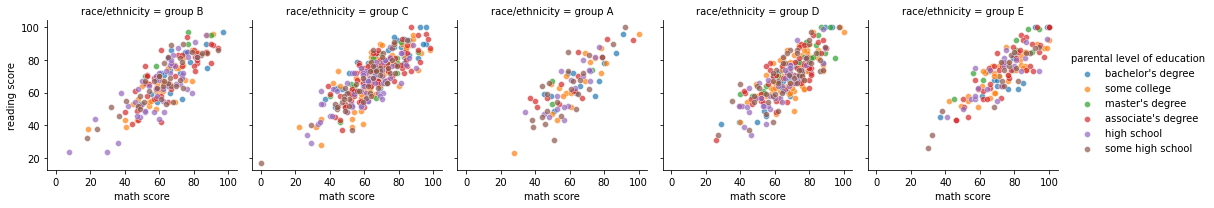

In [ ]:
#Pengaruh race and parent's education on math and reading score
plt.figure(figsize=(15,10))
g = sb.FacetGrid(data_raw, col="race/ethnicity", hue ='parental level of education' )
g.map(sb.scatterplot, "math score", "reading score", alpha=.7)
g.add_legend()

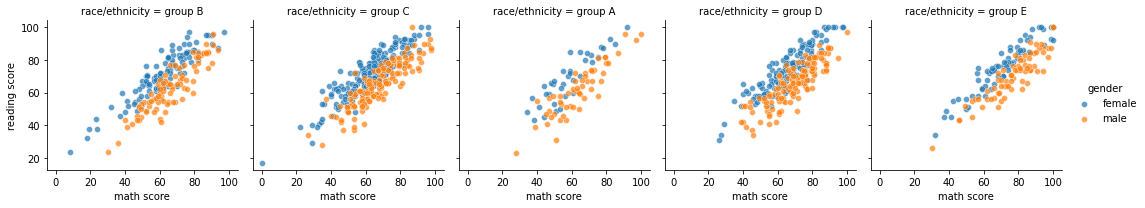

<Figure size 1080x720 with 0 Axes>

In [ ]:
#Pengaruh race and gender on math and reading score
g = sb.FacetGrid(data_raw, col="race/ethnicity", hue = 'gender')
g.map(sb.scatterplot, "math score", "reading score", alpha=.7)
plt.figure(figsize=(15,10))
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


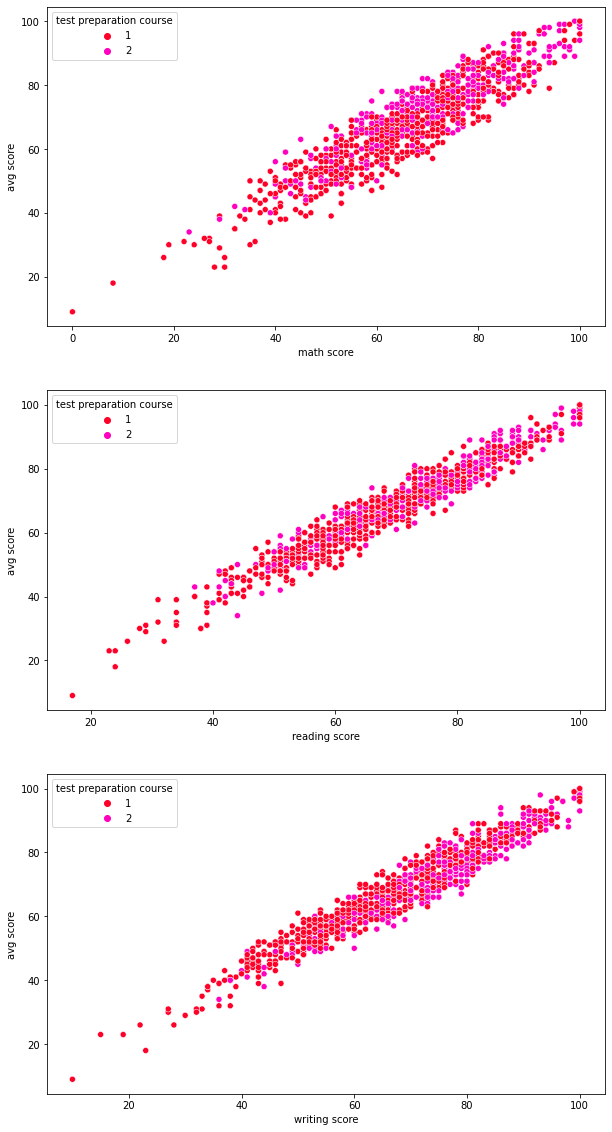

In [ ]:
# Data math, reading dan writing score sebelum dilakukan penghapusan outline 
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
sb.scatterplot(data["math score"],data["avg score"], hue=data["test preparation course"],palette="gist_rainbow")
plt.subplot(3,1,2)
sb.scatterplot(data["reading score"],data["avg score"], hue=data["test preparation course"],palette="gist_rainbow")
plt.subplot(3,1,3)
sb.scatterplot(data["writing score"],data["avg score"], hue=data["test preparation course"],palette="gist_rainbow")

##Nomor 3
#Menghilangkan outliner dan missing data jika ada

{'boxes': [<matplotlib.lines.Line2D at 0x7fe2938d8410>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe2938e03d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe2938e6410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe2938e0e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe2938d8910>,
  <matplotlib.lines.Line2D at 0x7fe2938d8e50>]}

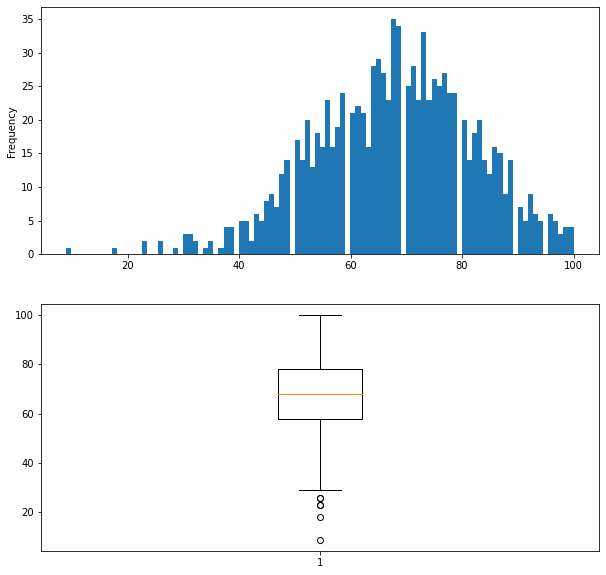

In [ ]:
# Menghilangkan outliner Avg
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
data['avg score'].plot(kind='hist', bins=100)
plt.subplot(2,1,2)
plt.boxplot(data['avg score'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fe2936c8110>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe2936ce0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe2936d6110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe2936ceb90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe2936c8610>,
  <matplotlib.lines.Line2D at 0x7fe2936c8b50>]}

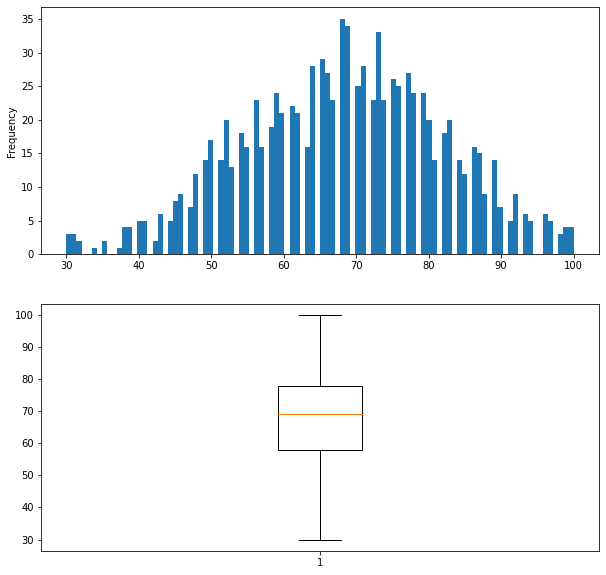

In [ ]:
# dari plot diatas ditemukan bahwa data berada di range 0-30
#sehingga diluar rentang tersebut merupakan outer data yang sebaiknya dihapus
clean_data_raw = data[data["avg score"]>=30]

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
clean_data_raw['avg score'].plot(kind='hist', bins=100)
plt.subplot(2,1,2)
plt.boxplot(clean_data_raw['avg score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


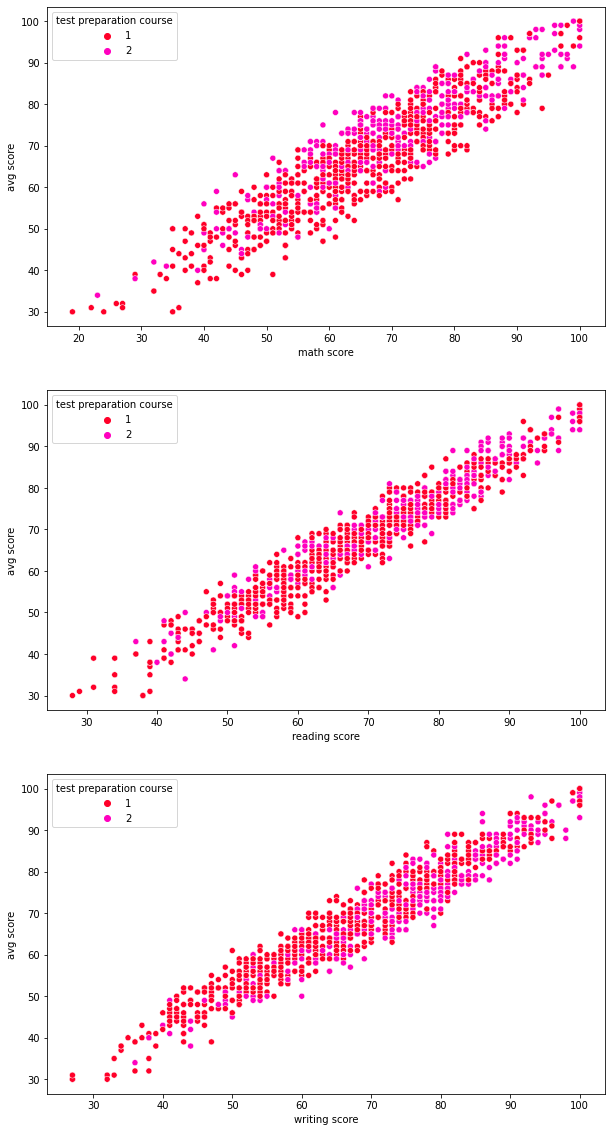

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
sb.scatterplot(clean_data_raw["math score"],clean_data_raw["avg score"], hue=clean_data_raw["test preparation course"],palette="gist_rainbow")
plt.subplot(3,1,2)
sb.scatterplot(clean_data_raw["reading score"],clean_data_raw["avg score"], hue=clean_data_raw["test preparation course"],palette="gist_rainbow")
plt.subplot(3,1,3)
sb.scatterplot(clean_data_raw["writing score"],clean_data_raw["avg score"], hue=clean_data_raw["test preparation course"],palette="gist_rainbow")

In [ ]:
# membagi data
test  = clean_data_raw[clean_data_raw["test preparation course"]==1]
non_test = clean_data_raw[clean_data_raw["test preparation course"]==2]

non_test

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
1,0,3,4,1,2,69,90,88,82
6,0,2,4,1,2,88,95,92,92
8,1,4,5,2,2,64,64,67,65
13,1,1,4,1,2,78,72,70,73
18,1,3,1,2,2,46,42,46,45
...,...,...,...,...,...,...,...,...,...
990,1,5,5,2,2,86,81,75,81
991,0,2,6,1,2,65,82,78,75
995,0,5,1,1,2,88,99,95,94
997,0,3,5,2,2,59,71,65,65


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


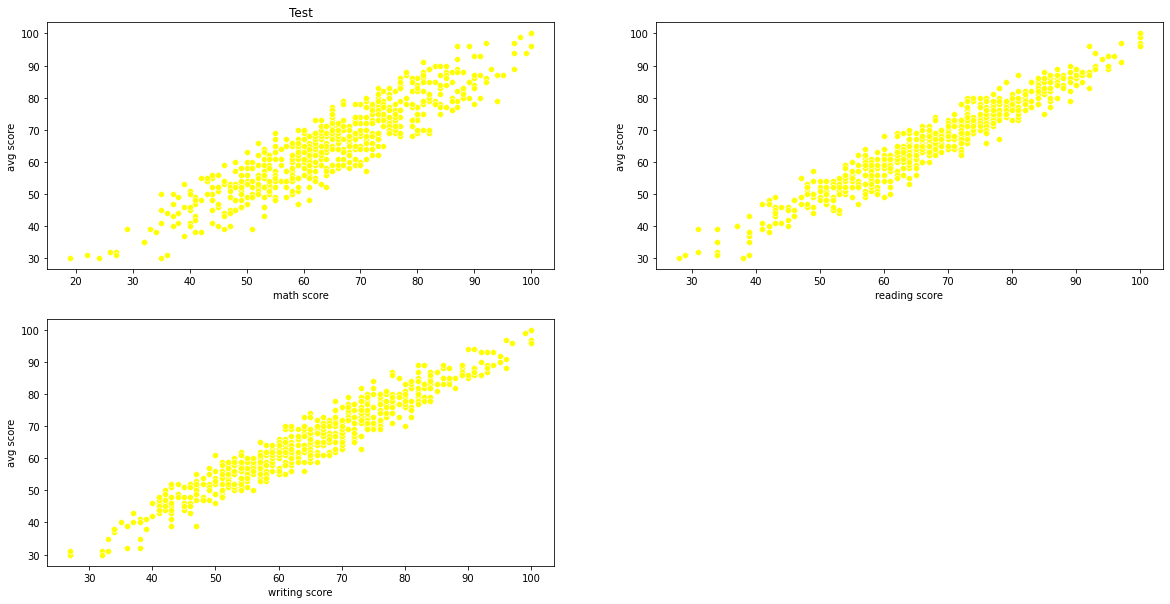

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("Test")
sb.scatterplot(test["math score"],test["avg score"], color="yellow")
plt.subplot(2,2,2)
sb.scatterplot(test["reading score"],test["avg score"],color="yellow")
plt.subplot(2,2,3)
sb.scatterplot(test["writing score"],test["avg score"],color="yellow")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


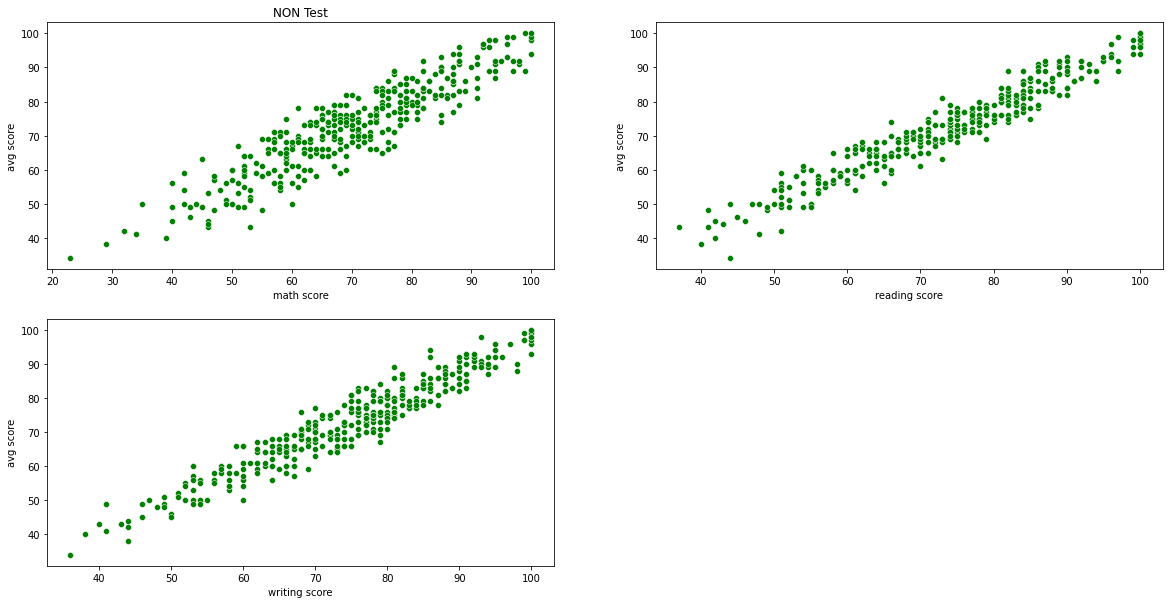

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("NON Test")
sb.scatterplot(non_test["math score"],non_test["avg score"], color="green")
plt.subplot(2,2,2)
sb.scatterplot(non_test["reading score"],non_test["avg score"],color="green")
plt.subplot(2,2,3)
sb.scatterplot(non_test["writing score"],non_test["avg score"],color="green")


<h1>cek missing data


In [ ]:
data[data.isnull().any(axis=1)].head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score


In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
avg score                      0
dtype: int64

Tidak terdapat data kosong dalam Dataset 

## Nomor  4 dan 5

  lakukan pemodelan regresi, analisis hasilnya
### single regression
menggunakan math score, reading score, writing score yang dikelompokan berdasarkan test preparation course 


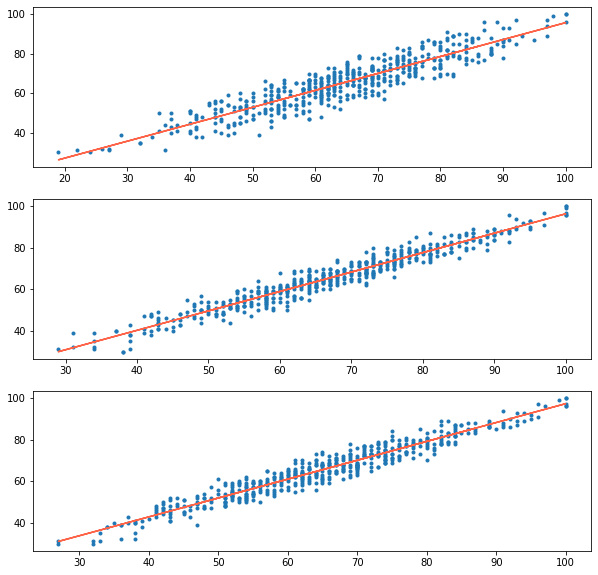

In [ ]:
y_avgscore = test[["avg score"]]

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
# math score
math_x_test= test[["math score"]]
math_x_test_train, math_x_test_test, math_y_test_train, math_y_test_test = train_test_split(math_x_test, y_avgscore, test_size = 0.2, random_state=42)

math_test_model = LinearRegression()
math_test_model.fit(math_x_test_train,math_y_test_train)
math_y_test_data_pred = math_test_model.predict(math_x_test_train)

plt.scatter(math_x_test_train, math_y_test_train, marker=".")
plt.plot(math_x_test_train, math_y_test_data_pred, color="tomato")


plt.subplot(3,1,2)
# reading score
reading_x_test= test[["reading score"]]
reading_x_test_train, reading_x_test_test, reading_y_test_train, reading_y_test_test = train_test_split(reading_x_test, y_avgscore, test_size = 0.2, random_state=42)

reading_test_model = LinearRegression()
reading_test_model.fit(reading_x_test_train,reading_y_test_train)
reading_y_test_data_pred = reading_test_model.predict(reading_x_test_train)

plt.scatter(reading_x_test_train, reading_y_test_train, marker=".")
plt.plot(reading_x_test_train, reading_y_test_data_pred, color="tomato")


plt.subplot(3,1,3)
# writing score
writing_x_test= test[["writing score"]]
writing_x_test_train, writing_x_test_test, writing_y_test_train, writing_y_test_test = train_test_split(writing_x_test, y_avgscore, test_size = 0.2, random_state=42)

writing_test_model = LinearRegression()
writing_test_model.fit(writing_x_test_train,writing_y_test_train)
writing_y_test_data_pred = writing_test_model.predict(writing_x_test_train)

plt.scatter(writing_x_test_train, writing_y_test_train, marker=".")
plt.plot(writing_x_test_train, writing_y_test_data_pred, color="tomato")



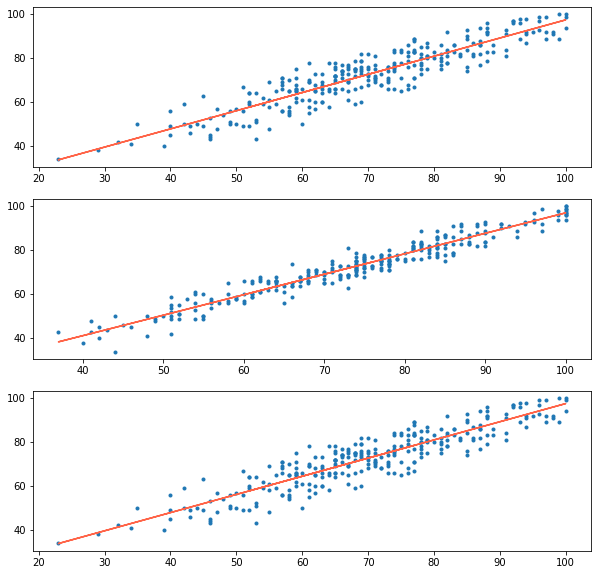

In [ ]:
y_nonavgscore = non_test[["avg score"]]

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
# math score
math_x_non_test= non_test[["math score"]]
math_x_non_test_train, math_x_non_test_test, math_y_non_test_train, math_y_non_test_test = train_test_split(math_x_non_test, y_nonavgscore, test_size = 0.2, random_state=42)

math_non_test_model = LinearRegression()
math_non_test_model.fit(math_x_non_test_train,math_y_non_test_train)
math_y_non_test_data_pred = math_non_test_model.predict(math_x_non_test_train)

plt.scatter(math_x_non_test_train, math_y_non_test_train, marker=".")
plt.plot(math_x_non_test_train, math_y_non_test_data_pred, color="tomato")


plt.subplot(3,1,2)
# reading score
reading_x_non_test= non_test[["reading score"]]
reading_x_non_test_train, reading_x_non_test_test, reading_y_non_test_train, reading_y_non_test_test = train_test_split(reading_x_non_test, y_nonavgscore, test_size = 0.2, random_state=42)

reading_non_test_model = LinearRegression()
reading_non_test_model.fit(reading_x_non_test_train,reading_y_non_test_train)
reading_y_non_test_data_pred = reading_non_test_model.predict(reading_x_non_test_train)

plt.scatter(reading_x_non_test_train, reading_y_non_test_train, marker=".")
plt.plot(reading_x_non_test_train, reading_y_non_test_data_pred, color="tomato")


plt.subplot(3,1,3)
# writing score
writing_x_non_test= non_test[["math score"]]
writing_x_non_test_train, writing_x_non_test_test, writing_y_non_test_train, writing_y_non_test_test = train_test_split(writing_x_non_test, y_nonavgscore, test_size = 0.2, random_state=42)

writing_non_test_model = LinearRegression()
writing_non_test_model.fit(writing_x_non_test_train,writing_y_non_test_train)
writing_non_y_test_data_pred = writing_non_test_model.predict(writing_x_non_test_train)

plt.scatter(writing_x_non_test_train, writing_y_non_test_train, marker=".")
plt.plot(writing_x_non_test_train, writing_non_y_test_data_pred, color="tomato")


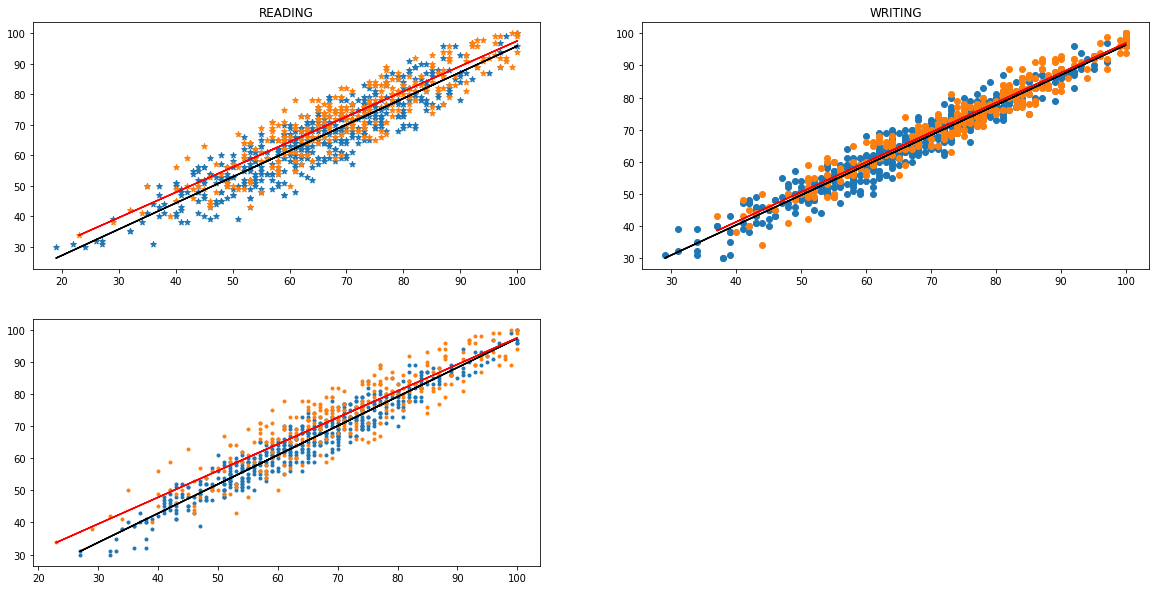

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("MATH")
plt.scatter(math_x_test_train, math_y_test_train, marker="*")
plt.plot(math_x_test_train, math_y_test_data_pred, color="black")
plt.scatter(math_x_non_test_train, math_y_non_test_train, marker="*")
plt.plot(math_x_non_test_train, math_y_non_test_data_pred, color="red")

plt.title("READING")
plt.subplot(2,2,2)
plt.scatter(reading_x_test_train, reading_y_test_train, marker="o")
plt.plot(reading_x_test_train, reading_y_test_data_pred, color="black")
plt.scatter(reading_x_non_test_train, reading_y_non_test_train, marker="o")
plt.plot(reading_x_non_test_train, reading_y_non_test_data_pred, color="red")

plt.title("WRITING")
plt.subplot(2,2,3)
plt.scatter(writing_x_test_train, writing_y_test_train, marker=".")
plt.plot(writing_x_test_train, writing_y_test_data_pred, color="black")
plt.scatter(writing_x_non_test_train, writing_y_non_test_train, marker=".")
plt.plot(writing_x_non_test_train, writing_non_y_test_data_pred, color="red")

In [ ]:
data_raw[["math score", "avg score"]].corr()

,math score,avg score
math score,1.000000,0.918442
avg score,0.918442,1.000000


<h1> Analisis Singel Regresion

In [ ]:
print("COEFISIEN")
print(f"math score_test preparation course_coef     : {math_test_model.coef_}")
print(f"reading_test preparation course_coef        : {reading_test_model.coef_}")
print(f"writing_test preparation course_coef        : {writing_test_model.coef_}")
print(f"math_non test preparation course_coef       : {math_non_test_model.coef_}")
print(f"reading_non test preparation course_coef    : {reading_non_test_model.coef_}")
print(f"writing_non test preparation course_coef    : {writing_non_test_model.coef_}")
print("===============================================================")
print("INTERCEPTION")
print(f"math score_test preparation course_intercept : {math_test_model.intercept_}")
print(f"reading_test preparation course_intercept    : {reading_test_model.intercept_}")
print(f"writing_test preparation course_intercept    : {writing_test_model.intercept_}")
print(f"math_non test preparation course_intercept   : {math_non_test_model.intercept_}")
print(f"reading_non test preparation course_intercept: {reading_non_test_model.intercept_}")
print(f"writing_non test preparation course_intercept: {writing_non_test_model.intercept_}")
print("===============================================================")

COEFISIEN
math score_test preparation course_coef     : [[0.85910197]]
reading_test preparation course_coef        : [[0.93606338]]
writing_test preparation course_coef        : [[0.90881983]]
math_non test preparation course_coef       : [[0.82869757]]
reading_non test preparation course_coef    : [[0.9299798]]
writing_non test preparation course_coef    : [[0.82869757]]
INTERCEPTION
math score_test preparation course_intercept : [9.94957262]
reading_test preparation course_intercept    : [2.79864577]
writing_test preparation course_intercept    : [6.4799816]
math_non test preparation course_intercept   : [14.67361829]
reading_non test preparation course_intercept: [4.04771049]
writing_non test preparation course_intercept: [14.67361829]




$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$
​
<b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

<h1>Multi Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Z = data[['math score', 'reading score', 'writing score', 'test preparation course','race/ethnicity','gender']]
Y = data[['avg score']]
lm.fit(Z, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_

array([0.02105688])

In [ ]:
lm.coef_

array([[ 0.33414459,  0.33190695,  0.33361329,  0.01849437, -0.00455467,
        -0.02985086]])

In [ ]:
from sklearn.metrics import mean_squared_error

Yhat=lm.predict(Z)

mean_squared_error(Yhat, Y)


0.07303946948965519

##Nomor 6
#Binning dan Regresi Logistik

In [ ]:
#binning

data_bin = data[['math score', 'reading score', 'writing score', 'test preparation course','race/ethnicity','gender','avg score']]


data_bin.head()

,math score,reading score,writing score,test preparation course,race/ethnicity,gender,avg score
0,72,72,74,1,2,0,73
1,69,90,88,2,3,0,82
2,90,95,93,1,2,0,93
3,47,57,44,1,1,1,49
4,76,78,75,1,3,1,76


In [ ]:
bins = np.linspace(min(data_bin["avg score"]), max(data_bin["avg score"]), 4)
bins

array([  9.        ,  39.33333333,  69.66666667, 100.        ])

In [ ]:
group_names = ['Failed', 'Passed with Warning','Passed' ]

In [ ]:
data_bin['avg score binned'] = pd.cut(data_bin['avg score'], bins, labels=group_names, include_lowest=True )
data_bin.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,math score,reading score,writing score,test preparation course,race/ethnicity,gender,avg score,avg score binned
0,72,72,74,1,2,0,73,Passed
1,69,90,88,2,3,0,82,Passed
2,90,95,93,1,2,0,93,Passed
3,47,57,44,1,1,1,49,Passed with Warning
4,76,78,75,1,3,1,76,Passed


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


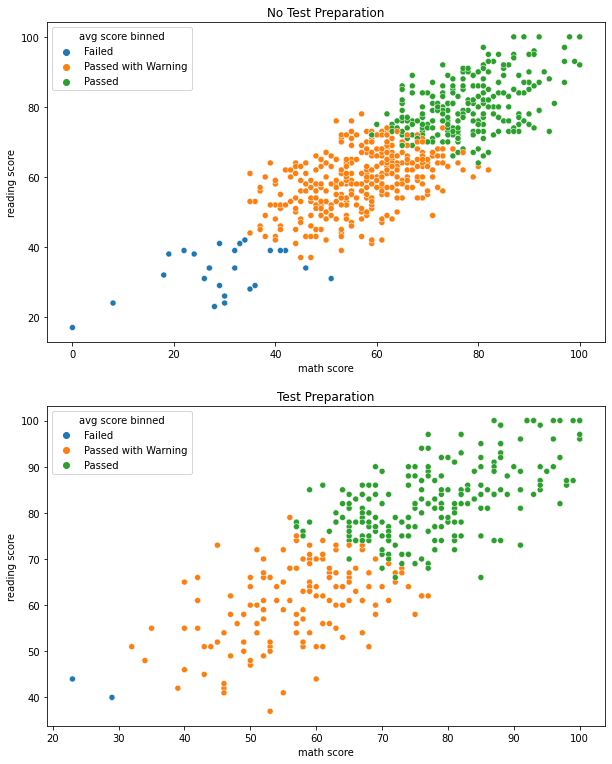

In [ ]:
plt.figure(figsize=(10,20))

plt.subplot(3,1,1)
plt.title("No Test Preparation")
sb.scatterplot(data_bin[data_bin["test preparation course"]==1]["math score"],data_bin[data_bin["test preparation course"]==1]["reading score"], hue=data_bin["avg score binned"])
plt.subplot(3,1,2)
plt.title("Test Preparation")
sb.scatterplot(data_bin[data_bin["test preparation course"]==2]["math score"],data_bin[data_bin["test preparation course"]==2]["reading score"], hue=data_bin["avg score binned"])


## Nomor 7
<pre>
Analisa Regresi logistik

In [ ]:
# Bin ke 2 
bins2 = np.linspace(min(data_bin["avg score"]), max(data_bin["avg score"]), 4)
bins2

array([  9.        ,  39.33333333,  69.66666667, 100.        ])

In [ ]:
labels_names = [ 1 ,2,3 ]

In [ ]:
data_bin['avg score binned'] = pd.cut(data_bin['avg score'], bins2, labels=labels_names, include_lowest=True )
data_bin.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,math score,reading score,writing score,test preparation course,race/ethnicity,gender,avg score,avg score binned
0,72,72,74,1,2,0,73,3
1,69,90,88,2,3,0,82,3
2,90,95,93,1,2,0,93,3
3,47,57,44,1,1,1,49,2
4,76,78,75,1,3,1,76,3


In [ ]:
#pisahkan atribut dan label
atribut = data[
    ["math score",
    "reading score",
    "test preparation course"
]]
label = data_bin["avg score binned"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2, random_state=42)
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
logistic_pred = logistic.predict(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(f"koefisien          : ")
print(f"{logistic.coef_}")
print(f"intercept          : {logistic.intercept_}")
print(f"score              : {logistic.score(x_test,y_test)}")
print(f"mean_squared_error : {mean_squared_error(y_train, logistic_pred)}")
print(f"mean_absolute_error: {mean_absolute_error(y_train, logistic_pred)}")
print(f"r2_score           : {r2_score(y_train, logistic_pred)}")

koefisien          : 
[[-0.37205033 -0.64992686  4.04261349]
 [ 0.0851336   0.13284621 -2.00798968]
 [ 0.28691674  0.51708065 -2.03462381]]
intercept          : [ 41.5379942   -0.34231473 -41.19567947]
score              : 0.955
mean_squared_error : 0.04
mean_absolute_error: 0.04
r2_score           : 0.8629366885289788


In [ ]:
data_bin["avg score binned"].value_counts()

2    509
3    464
1     27
Name: avg score binned, dtype: int64

Text(0.5, 1.0, 'Avg Score')

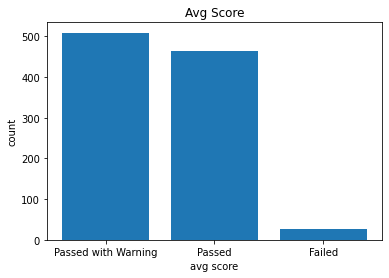

In [ ]:
import matplotlib as plt
from matplotlib import pyplot
group_names = ['Passed with Warning','Passed','Failed']
pyplot.bar(group_names, data_bin["avg score binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("avg score")
plt.pyplot.ylabel("count")
plt.pyplot.title("Avg Score")